In [31]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Text(0.5,0.92,'Uniform prior landscape; alterate view')

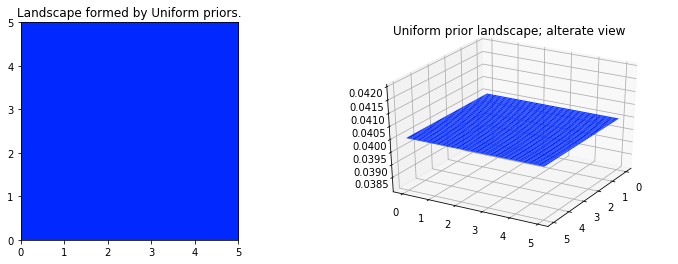

In [32]:
figsize(12.5, 4)

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
              cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Landscape formed by Uniform priors.')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
plt.title('Uniform prior landscape; alterate view')

Text(0.5,0.92,'$Exp(3), Exp(10)$ prior landscape; \nalternate view')

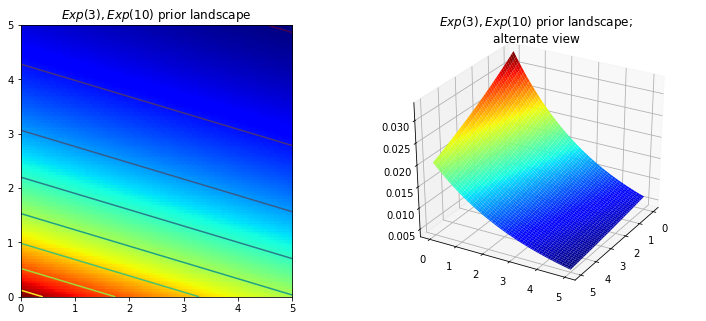

In [33]:
figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title("$Exp(3), Exp(10)$ prior landscape")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet)
ax.view_init(azim=390)
plt.title("$Exp(3), Exp(10)$ prior landscape; \nalternate view")

In [34]:
N = 1

lambda_1_true = 1
lambda_2_true = 3

data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))   
], axis=1)
print('observed (2-dimensional, sample size = %d):' % N, data)

x = y = np.linspace(.01, 5, 100)
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x)
                        for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 0], _y)
                        for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

observed (2-dimensional, sample size = 1): [[3 3]]


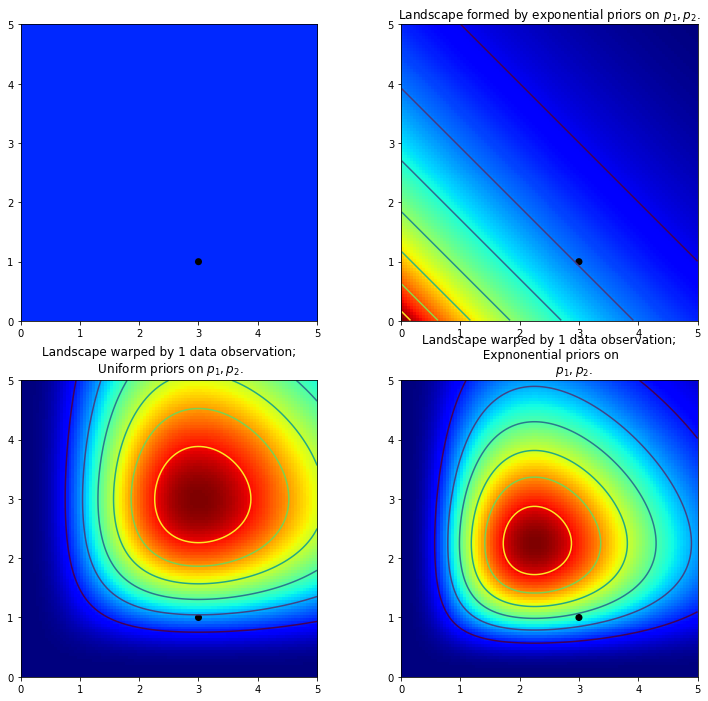

In [35]:
figsize(12.5, 12)

plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(x, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')
plt.xlim(0, 5)
plt.ylim(0, 5)


plt.subplot(223)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title('Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$.' % N)
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')

plt.xlim(0, 5)
plt.ylim(0, 5)


plt.subplot(222)
exp_x = stats.expon.pdf(x, loc=0, scale=3)
exp_y = stats.expon.pdf(y, loc=0, scale=3)
M = np.dot(exp_x[:, None], exp_y[None, :])

plt.contour(x, y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title('Landscape formed by exponential priors on $p_1, p_2$.')
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')

plt.xlim(0, 5)
plt.ylim(0, 5)


plt.subplot(224)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title("""Landscape warped by %d data observation;\n Expnonential priors on
             $p_1, p_2$.""" % N)
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')    

plt.xlim(0, 5)
plt.ylim(0, 5);